# Atividade de reconhecimento de face

## Importação das bibliotecas e montagem do drive

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import os
import zipfile

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
caminho = '/content/drive/MyDrive/estudo de visao computacional/Datasets/jones_gabriel.zip'
arquivo = zipfile.ZipFile(file=caminho, mode='r')
arquivo.extractall('./')
arquivo.close()

In [4]:
caminho = '/content/jones_gabriel'
caminhos = [os.path.join(caminho, f) for f in os.listdir(caminho)]
faces = []
ids = []
for face in caminhos:
  imagem = Image.open(face).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  id = int(os.path.split(face)[1].split('.')[1])
  faces.append(imagem_np)
  ids.append(id)
ids = np.array(ids)

In [5]:
len(faces)

50

In [6]:
len(ids)

50

In [9]:
lbph = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 14, grid_x = 9, grid_y = 9)
lbph.train(faces, ids)
lbph.write('classificador_lbph.yml')

In [10]:
classificador_face = cv2.face.LBPHFaceRecognizer_create()
classificador_face.read('/content/classificador_lbph.yml')

In [11]:
imagem_teste = "/content/jones_gabriel/person.2.14.jpg"
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')

In [12]:
previsao = classificador_face.predict(imagem_np)
previsao

(2, 0.0)

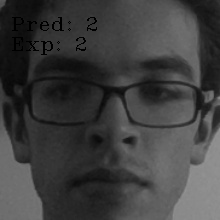

In [13]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[1])
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(imagem_np)